In [9]:
import numpy as np                  #Import numpy so that we can actually do maths ...
import matplotlib.pyplot as plt      #and make pretty plots.

InitVal = np.array([[0],[10]])      #Specify the 'true' initial values of the quantity we are estimating. 

Dt = 2

A = np.eye(2)
A[0,1] = Dt

X0 = np.array([[-15],[0]])          #Specify an initial estimate ...
P0 = np.diag([15,10])                #and an estimated variance of our initial estimate.

H = np.array([[1,0]])

MeasErr = np.array([[10]])          #Specify an estimated error in the measurements.
                                     #This will be used as the variance of the measurements' distribution. 

N = 10                              #Specify a number of iterations to perform.

In [10]:
Estim = np.zeros((2,N+1))           #Initialise arrays to record the estimated and 'measured' values.
Measu = np.zeros((1,N))

i = 0                               #Start an iteration counter.
Estim.T[0] = X0.T                   #Write the initial estimate into the record.

TrueVal = A@InitVal

X = X0                              #X -- State matrix
P = P0                              #P -- State covariance matrix
R = MeasErr                         #R -- Measurement covariance matrix

while i < N:
    Xp = A@X                        #Xp -- Predicted state
    Pp = A@P@A.T                    #Pp -- Predicted state covariance
    
    Y = np.random.normal(TrueVal[0],R[0,0])
    Measu[0,i] = Y                            #Y -- 'Measured' value
    
    K = Pp@H.T@np.linalg.inv(H@Pp@H.T + R)    #K -- Kalman gain
    
    X = Xp + K@(Y - H@Xp)           #Update X and P
    P = (np.eye(2) - K@H)@Pp
    i = i+1                         #Increment the iteration counter,
    Estim.T[i] = X.T                #and write the new estimated values to the record.
    TrueVal = A@TrueVal

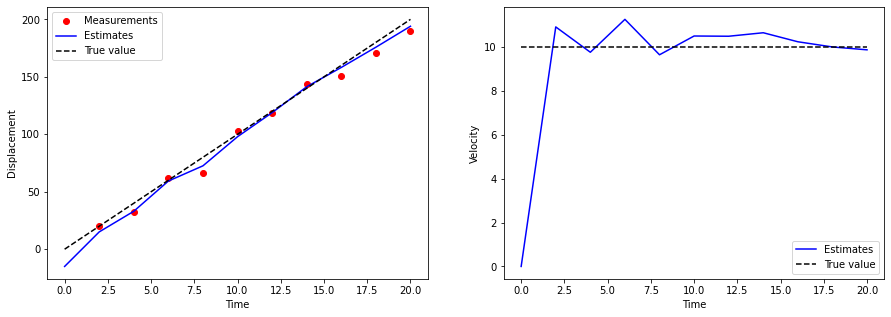

In [11]:
xt = np.array(list(range(0,N+1)))*Dt
xxt = np.array(list(range(1,N+1)))*Dt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(xxt, Measu.T,'ro',label='Measurements')
ax1.plot(xt, Estim[0],'b',label='Estimates')
ax1.plot(xt, InitVal[0]*np.ones(N+1) + xt*InitVal[1],'k--',label='True value')
ax1.set_xlabel('Time')
ax1.set_ylabel('Displacement')
ax1.legend()
ax2.plot(xt, Estim[1],'b',label='Estimates')
ax2.plot(xt, TrueVal[1]*np.ones(N+1),'k--',label='True value')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.legend()